In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [84]:
df = pd.read_csv('quarterly_greenhouse.csv')

In [98]:
df['Country'].unique()

array(['Advanced Economies', 'Africa', 'Americas', 'Asia',
       'Australia and New Zealand', 'Central Asia', 'Eastern Asia',
       'Eastern Europe', 'Emerging and Developing Economies', 'Europe',
       'G20', 'G7', 'Latin America and the Caribbean', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania',
       'Other Oceania sub-regions', 'South-eastern Asia', 'Southern Asia',
       'Southern Europe', 'Sub-Saharan Africa', 'Western Asia',
       'Western Europe', 'World'], dtype=object)

In [99]:
adv_df = df[df['Country'] == 'Advanced Economies']
emerging_df = df[df['Country'] == 'Emerging and Developing Economies']  

In [100]:
adv_df = adv_df[
    (adv_df['Industry'] == 'Mining')&
    (adv_df['Gas Type'] == 'Greenhouse gas')& (adv_df['Seasonal Adjustment'] == 'Seasonally Adjusted')]

adv_df.drop(columns=['ISO3','ISO2','ObjectId','Source','Unit','CTS Code','CTS Name','CTS Full Descriptor','Industry','Gas Type','Seasonal Adjustment','Scale'], inplace=True    )
adv_df = adv_df.T.reset_index()
adv_df = adv_df.iloc[2:, :]
adv_df.rename(columns={adv_df.columns[0]:'Quarter', adv_df.columns[1]:'Emissions'}, inplace=True)

In [101]:
emerging_df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Industry,Gas Type,Seasonal Adjustment,Scale,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2,2024Q3,2024Q4,2025Q1
776,791,Emerging and Developing Economies,NaN,EMDETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...","Agriculture, Forestry and Fishing",Carbon dioxide,Not Seasonally Adjusted,Units,65.567846,68.756007,70.878826,74.896137,74.091417,72.479677,72.218046,73.438872,69.778221,68.278161,68.867576,71.549282,70.753986,71.055937,71.540710,73.235519,71.340210,70.164871,71.862483,74.526313,73.146716,71.691532,73.006534,75.073687,74.763609,71.526674,74.622839,75.547984,75.476635,70.660240,74.398492,74.282215,71.813032,70.060973,75.115227,76.803104,70.855536,69.898530,75.667513,77.834284,71.418970,70.814875,76.041464,80.795108,75.053697,73.338055,76.070025,76.561542,77.234705,71.498960,77.546838,77.272071,76.761676,74.296909,79.084480,78.739989,79.052268,75.075621,80.534515,80.560955,79.483159
777,792,Emerging and Developing Economies,NaN,EMDETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...","Agriculture, Forestry and Fishing",Carbon dioxide,Seasonally Adjusted,Units,65.353484,69.642090,72.060969,73.042273,73.997897,73.510709,72.882707,71.836699,70.100054,68.950574,69.483137,69.939475,70.912057,72.394132,71.804161,71.475802,71.291131,71.798361,71.925444,72.878942,73.160434,73.462099,73.156793,73.139143,74.738574,74.248183,74.194238,73.280110,75.387974,73.731947,73.735051,71.962611,72.704228,73.353254,73.829258,73.905594,72.282180,72.978284,74.431985,74.563413,72.660850,73.587232,75.444133,77.378201,75.941452,76.292188,74.371981,74.417697,77.564620,74.434299,75.866980,75.686674,76.552200,77.428605,77.521068,77.381182,78.577423,78.143920,79.113503,78.845541,79.052999
778,793,Emerging and Developing Economies,NaN,EMDETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...","Agriculture, Forestry and Fishing",Fluorinated gases,Not Seasonally Adjusted,Units,0.062750,0.072392,0.080884,0.090137,0.082050,0.097527,0.107953,0.113054,0.092494,0.101574,0.108417,0.111905,0.093987,0.107451,0.118414,0.124335,0.105843,0.121472,0.133596,0.140375,0.120751,0.136268,0.146821,0.150383,0.122426,0.135692,0.143063,0.144232,0.118520,0.131379,0.140136,0.141203,0.116352,0.130193,0.139893,0.140835,0.115939,0.130676,0.143297,0.149270,0.125575,0.124760,0.147696,0.153266,0.124188,0.137807,0.145142,0.144330,0.113911,0.124714,0.131595,0.130651,0.106608,0.121901,0.133513,0.134613,0.109666,0.124680,0.134490,0.136340,0.110542
779,794,Emerging and Developing Economies,NaN,EMDETMP,Quarterly greenhouse gas (GHG) air emissions a...,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Dev...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions ...,"Environment, Climate Change, Greenhouse Gas Em...","Agriculture, Forestry and Fishing",Fluorinated gases,Seasonally Adjusted,Units,0.070965,0.073740,0.077227,0.084230,0.092349,0.099229,0.103309,0.105697,0.103855,0.103020,0.103186,0.104330,0.105820,0.109239,0.112918,0.116209,0.1192

In [102]:
emerging_df = emerging_df[
    (emerging_df['Industry'] == 'Mining')&
    (emerging_df['Gas Type'] == 'Greenhouse gas')& (emerging_df['Seasonal Adjustment'] == 'Seasonally Adjusted')]

emerging_df.drop(columns=['ISO3','ISO2','ObjectId','Source','Unit','CTS Code','CTS Name','CTS Full Descriptor','Industry','Gas Type','Seasonal Adjustment','Scale'], inplace=True    )
emerging_df = emerging_df.T.reset_index()
emerging_df = emerging_df.iloc[2:, :]
emerging_df.rename(columns={emerging_df.columns[0]:'Quarter', emerging_df.columns[1]:'Emissions'}, inplace=True)

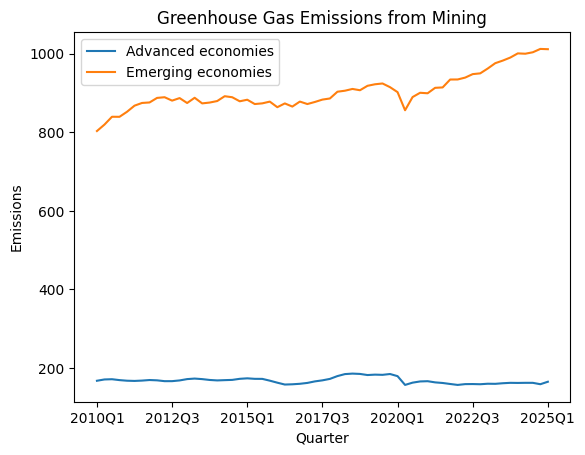

In [105]:
ax = adv_df.plot(
    x='Quarter',
    y='Emissions',
    label='Advanced economies',
    title='Greenhouse Gas Emissions from Mining'
)

emerging_df.plot(
    x='Quarter',
    y='Emissions',
    label='Emerging economies',
    ax=ax
)

ax.set_ylabel('Emissions')
ax.legend()
